# Influencer Impact and Marketing Sales Modeling and Analysis

## **Introduction**

In this project, I will analyze historical marketing promotion data to explore the impact and relationship between influencer marketing and promotional budgets (TV, Radio, Social Media) on sales performance using machine learning and statistical modeling techniques in Python. As part of an analytics team, my goal is to help the company optimize its marketing strategies by identifying which promotional channels and influencer types most effectively drive sales. Using Python, I will perform exploratory data analysis (EDA), clean and preprocess the data, and build simple and multiple linear regression models to evaluate the influence of these variables on sales. Additionally, I will validate key regression assumptions, interpret model coefficients, and provide actionable insights for resource allocation. These analyses will deliver valuable insights into marketing effectiveness, enabling data-driven decisions to maximize sales growth and improve return on investment.

## **Overview**  

To achieve the objectives of this project, I will:  

- **Perform Exploratory Data Analysis (EDA):** Summarize and visualize key characteristics of the marketing and sales dataset, including promotional budgets across TV, radio, and social media, as well as influencer size and sales revenue. This will help identify patterns, relationships, and potential predictors of sales.  

- **Conduct Data Cleaning:** Handle missing values and inconsistencies in the dataset to ensure the quality and reliability of the data for modeling. This includes dropping rows with missing sales data and renaming columns to ensure compatibility with modeling functions.  

- **Build Regression Models:** Construct both simple and multiple linear regression models to examine the relationships between promotional budgets (TV, radio, social media) and sales revenue. This will involve validating key assumptions such as linearity, normality, independence, and homoscedasticity.  

- **Evaluate Model Performance:** Assess the performance of the regression models using metrics such as R-squared, p-values, and confidence intervals to determine the strength and significance of the relationships between variables.  

- **Check for Multicollinearity:** Ensure that the independent variables in the multiple linear regression model are not highly correlated with each other by using techniques such as variance inflation factor (VIF) analysis.  

- **Visualize Results:** Create clear and informative visualizations, such as scatterplots, residual plots, and Q-Q plots, to effectively communicate the findings and validate model assumptions.  

- **Interpret and Summarize Findings:** Analyze the model outputs, interpret the coefficients, and draw actionable conclusions to support marketing strategy decisions. This includes identifying which promotional channels (TV, radio, social media) have the strongest impact on sales and providing recommendations for budget allocation.  

By carrying out these steps, I aim to provide actionable insights that support the organization's marketing strategy. This analysis will help identify the most effective promotional channels for driving sales and inform future marketing budget decisions. The results will enable the organization to optimize its marketing efforts and maximize return on investment.

## **Dataset Structure**  

### **Marketing Sales Dataset**  
This dataset contains historical marketing and sales data from various promotional campaigns. It includes information on different advertising channels, influencer marketing types, and the corresponding sales revenue. The dataset helps analyze the relationship between marketing investments and sales performance.  

#### **Dataset: Marketing Sales Data**  
This dataset includes the following features:  
- **TV**: The level of investment in TV advertisements (Low, Medium, High).  
- **Radio**: The amount spent on radio promotions (in millions of dollars).  
- **Social Media**: The budget allocated to social media marketing (in millions of dollars).  
- **Influencer**: The type of influencer used in the campaign (Micro, Macro, Mega).  
- **Sales**: The total revenue generated from the marketing campaign (in millions of dollars).  

This dataset will be used to **analyze the impact of different marketing strategies on sales, build regression models to identify key drivers, and provide insights for optimizing marketing budgets.**

## Importing Required Libraries
Before beginning the analysis, it is essential to import all necessary libraries. 

In [391]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Building and Evaluating a Simple Linear Regression Model

### **Introduction**

In this section, I will perform a simple linear regression analysis to examine the relationship between the radio promotion budget and sales. By assessing the strength and direction of this relationship, I aim to determine whether radio marketing investments have a significant impact on revenue. This analysis will help company leaders make data-driven decisions about allocating future marketing resources. Using Python, I will explore the dataset, build a regression model, evaluate its performance, and interpret the results to extract meaningful business insights.

I will load the dataset and display a sample of the data.

In [392]:
data=pd.read_csv(r"C:\Users\saswa\Documents\GitHub\Influencer-Impact-and-Marketing-Sales-Modeling-and-Analysis\Data\marketing_sales_data.csv")

The dataset is a CSV file (`marketing_sales_data.csv`) containing information about influencer-driven marketing and corresponding sales. The numerical variables in the data represent amounts in millions of dollars.

### **Data Exploration**


In [393]:
data.head(10)


,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


### **Observations on Variables**

The dataset consists of five key variables: TV, Radio, Social Media, Influencer type, and Sales. Upon examination:

- TV: This field categorizes the promotion budget into three levels: Low, Medium, and High. These categories represent qualitative values rather than numerical amounts, differentiating it from other budget-related fields.

- Radio and Social Media: These fields contain numerical values representing the actual budgets allocated to these platforms for the promotion.

- Influencer: This field indicates the type of influencer involved in the promotion, categorized by the number of followers. The options include Mega, Macro, Micro, and Nano, where the classification depends on the influencer's follower count.

- Sales: This field represents the revenue generated from the promotional campaigns, serving as the dependent variable in the analysis.

The overall structure reflects both categorical and numerical variables, with Sales as the dependent outcome based on different marketing strategies.

Next, to get a sense of the size of the dataset, I willl identify the number of rows and the number of columns.

In [394]:
data.shape


(572, 5)

**Dataset Size:** 572 rows and 5 columns. Each row represents a unique observation, detailing different marketing strategies and their resulting sales. The dataset includes promotional budgets for TV, Radio, and Social Media, the type of influencer used, and the corresponding sales generated from these campaigns.

Now, I will check for missing values in the dataset. This is important because missing values can impact the accuracy of my model when analyzing the relationship between variables. To do this, I will first generate Booleans that indicate whether each value is missing. Then, I will check both columns and rows for any missing values.

In [395]:
data.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


In [396]:
data.isna().any(axis=0)

TV               True
Radio            True
Social Media    False
Influencer      False
Sales            True
dtype: bool

In [397]:
data.isna().any(axis=0).sum()


np.int64(3)

**Missing Values:** 3 rows contain missing values across multiple columns. 

In [398]:
data[data[['TV', 'Radio', 'Sales']].isna().any(axis=1)]


,TV,Radio,Social Media,Influencer,Sales
232,NaN,34.111674,4.624148,Nano,342.913372
443,High,36.466753,5.635992,Mega,NaN
510,Low,NaN,4.132526,Macro,78.031498


In [399]:
data.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Length: 572, dtype: bool

In [400]:
data.isna().any(axis=1).sum()

np.int64(3)

There are 3 rows with missing values across 3 columns. While this is a small proportion compared to the total number of rows, it’s important to address these missing values before proceeding with modeling. In this case, it may be appropriate to either drop these rows or handle the missing values using imputation methods, depending on the context and the modeling approach.


Next, I will drop any rows that contain missing values. Data cleaning ensures that my dataset is more reliable for analysis and regression. After removing the missing values, I will verify that the resulting dataset no longer contains any rows with missing data.

In [401]:
data = data.dropna(axis=0)

To confirm that missing values have been removed:


In [402]:
data.isna().any(axis=1).sum()


np.int64(0)

## **Checking Model Assumptions**  

The next step in this task is to check the assumptions of linear regression. To analyze the relationship between the radio promotion budget and sales, I will model this relationship using linear regression. 

A simple linear regression model must satisfy four key assumptions:  
1. **Linearity** – The relationship between X and Y is linear.  
2. **Normality** – The residuals follow a normal distribution.  
3. **Independent observations** – Observations are not correlated.  
4. **Homoscedasticity** – Residuals have constant variance.  

Note: Some assumptions can be assessed before constructing the model, and I will address those in this section. After building the model, I will complete the assumption checks.

Before building the model, I will first verify whether the necessary assumptions for linear regression hold in this context.

I visualize pairwise relationships in the dataset to check model assumptions:

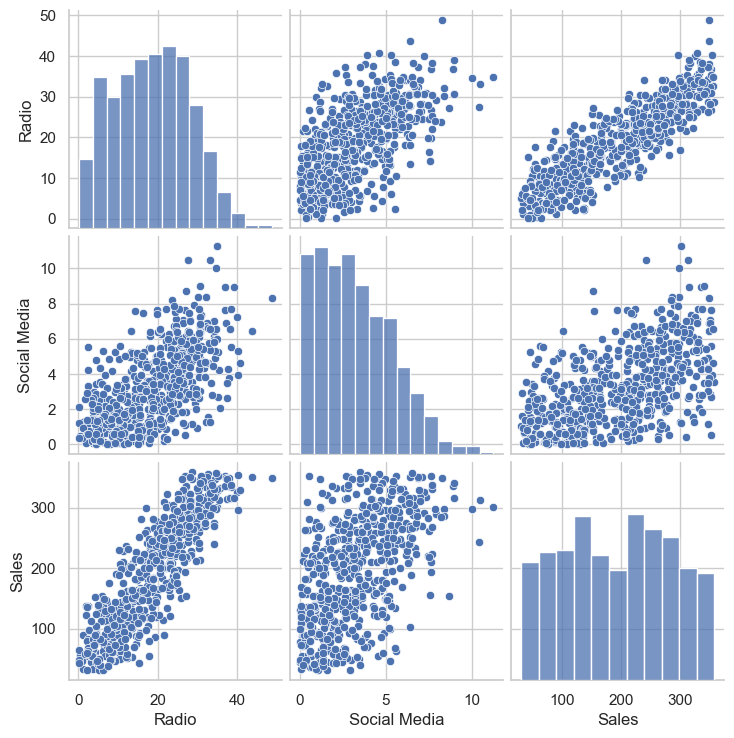

In [403]:
sns.pairplot(data=data)

#### **Linearity Check**
The scatter plot of Sales versus Radio shows a clear linear relationship. The points appear to follow a roughly straight line, suggesting a positive correlation between the two variables. This indicates that as the radio promotion budget increases, sales tend to increase as well, supporting the assumption of linearity.

## **Model Building**

To focus on the variables of interest, I subset the data:

In [404]:
ols_data = data[['Radio', 'Sales']]


I display the first 10 rows to confirm the structure:


In [405]:
ols_data.head(10)


,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


The linear regression formula for modeling the relationship between the radio promotion budget and sales is:

In [406]:
ols_formula = "Sales ~ Radio"


Then, I apply the ordinary least squares (OLS) method:


In [407]:
OLS = ols(formula=ols_formula, data=ols_data)


I create the linear regression model and fit it to the data:


In [408]:
slr_model = OLS.fit()


## **Results and Evaluation**

To examine the model output, I generate a summary of the results:

In [409]:
slr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Wed, 26 Mar 2025   Prob (F-statistic):          2.07e-176
Time:                        16:31:24   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Next, I will analyze the bottom table from the results summary. This table provides the coefficients that define the line of best fit for the model. These coefficients include the **y-intercept** (the predicted sales when the radio promotion budget is zero) and the **slope** (the change in sales for each unit increase in the radio promotion budget). Understanding these values will help interpret the relationship between radio spending and sales.

### **Model Summary and Interpretation**  

The **R-squared** value tells me how much of the variation in **sales** is explained by the model. A higher R-squared indicates a better model fit.  

I will also focus on the coefficients and their corresponding **p-values** to understand the relationship between radio promotion budget and sales.  

### **Model Summary**  
- **R-squared:** 0.757  
  - This means that **75.7% of the variation in sales** is explained by the radio promotion budget. This indicates a strong relationship between the two variables.  
- **Adj. R-squared:** 0.757  
  - Since there is only one predictor, the adjusted R-squared is the same as the R-squared value.  
- **F-statistic:** 1768  
  - This large F-statistic, along with a very low **p-value (2.07e-176)**, indicates that the model is statistically significant, meaning the radio promotion budget is strongly associated with sales.  

### **Coefficients and Interpretation**  
The coefficients represent the relationship between **radio promotion budget** and **sales**.  

- **Intercept: 41.5326**  
  - This represents the predicted sales when the radio promotion budget is **zero**. While this value is useful for model interpretation, it may not have practical significance.  
- **Radio Promotion Budget: 8.1733**  
  - For every **$1 million increase** in the radio budget, **sales increase by approximately $8.17 million**, holding all other factors constant.  
  - This coefficient is highly significant (**p-value = 0.000**), indicating a strong relationship between radio promotion and sales.  

### **Statistical Significance**  
The **p-values** for both the intercept and the radio budget coefficient are below **0.05**, meaning they are statistically significant. This confirms that the radio promotion budget has a meaningful impact on sales.  

### **Confidence Intervals**  
The **95% confidence interval** for the radio budget coefficient is **[7.791, 8.555]**. This means that I am **95% confident** that the true effect of the radio promotion budget on sales falls within this range. The narrow confidence interval suggests a precise estimate of the effect.  

### **Key Observations**  
- **Strong relationship** between radio promotion budget and sales (**R² = 0.757**).  
- **Statistically significant** model, meaning the radio budget is a meaningful predictor of sales.  
- **For every $1M increase** in the radio budget, **sales increase by approximately $8.17M**.  
- The model provides valuable insights for marketing budget allocation, emphasizing the importance of radio promotions in driving sales.

To validate the model assumptions, I will visualize the OLS regression results by plotting the data points along with the best-fit regression line. This will help assess how well the linear model captures the relationship between the radio promotion budget and sales.

<Axes: xlabel='Radio', ylabel='Sales'>

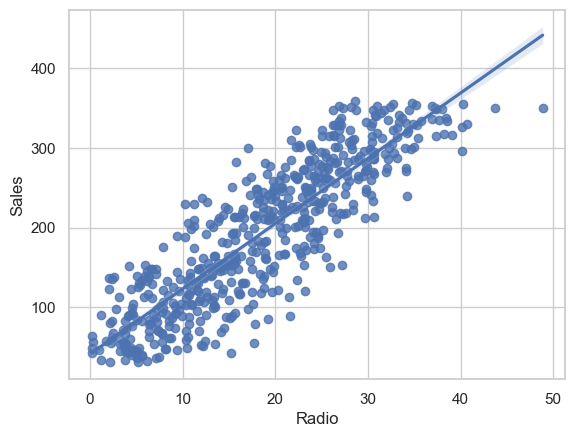

In [410]:
sns.regplot(x='Radio', y='Sales', data=ols_data)


**Regression Plot Observation:** The preceding regression plot shows a clear linear relationship between the two variables, with the points clustering around the best-fit line. This indicates a positive correlation between the radio promotion budget and sales, supporting the assumption of linearity.

### **Assumption Checks**
#### **Normality Check**

To check the normality assumption, I will first extract the residuals from the linear regression model. Residuals represent the difference between the actual and predicted sales values. If the residuals follow a normal distribution, the normality assumption of linear regression is satisfied.


In [411]:
residuals = slr_model.resid


I then visualize the residual distribution:


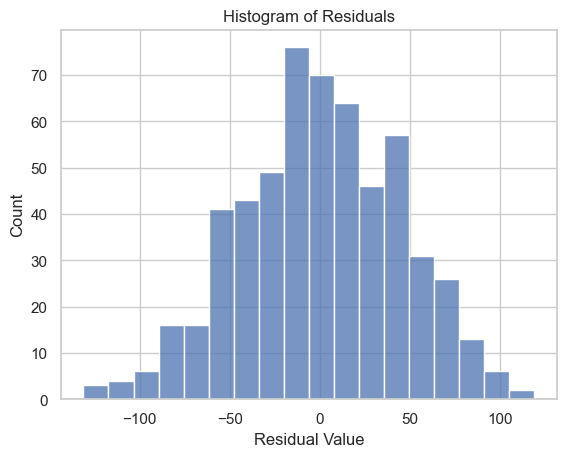

In [412]:
fig = sns.histplot(data=residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

**Observation:** Based on the preceding visualization, the distribution of the residuals appears to be fairly normal, though there is some slight left skewness. This suggests that the assumption of normality is mostly met, but there may be a minor deviation from perfect normality.


To confirm normality, I generate a Q-Q plot:

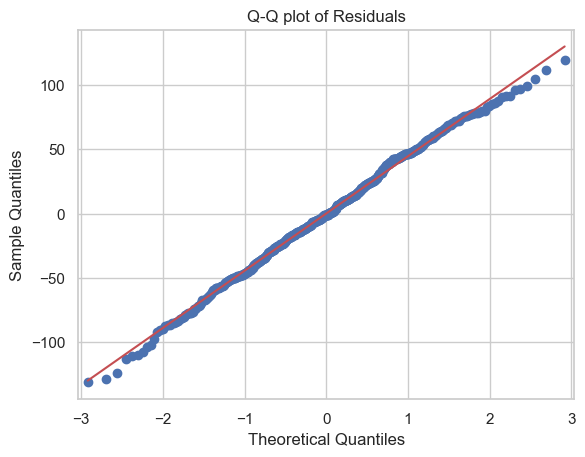

In [413]:
sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()

**Observation:** The assumption of normality appears to be met. In the Q-Q plot, the residuals' quantiles closely follow the theoretical quantiles of a standard normal distribution, aligning along the diagonal line. This linearity and the accumulation of points around the line suggest that the residuals are normally distributed.

#### **Independence and Homoscedasticity**

I obtain fitted values:

In [414]:
fitted_values = slr_model.predict(ols_data['Radio'])


I then create a scatterplot of residuals vs. fitted values:


Text(0, 0.5, 'Residuals')

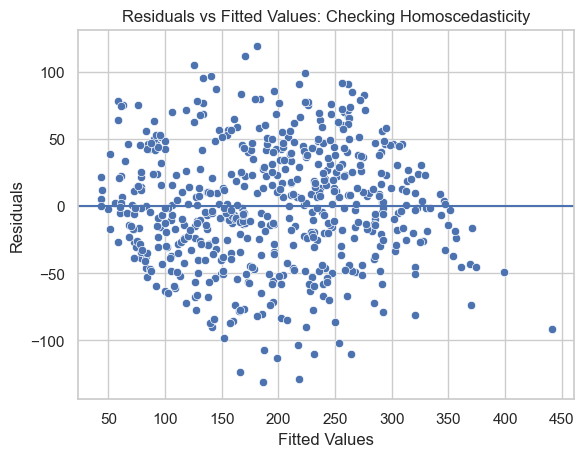

In [415]:
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0)
plt.title("Residuals vs Fitted Values: Checking Homoscedasticity")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")     

**Observation:** 

#### **Independent Observations**  
The assumption of **independent observations** appears to be reasonable in this context. Since each marketing campaign represents a unique observation, one campaign’s sales outcome is unlikely to directly influence another.  

#### **Homoscedasticity (Constant Variance of Residuals)**  
The residuals appear to be **evenly distributed** across different levels of the predictor variable (Radio Promotion Budget). In the scatterplot of residuals vs. fitted values, the points are randomly scattered without any clear pattern, suggesting that the variance of residuals remains constant. This confirms that the assumption of **homoscedasticity** is met.


### **Key Takeaways**  

- **Regression Relationship & Model Fit**: The simple linear regression model shows a **positive correlation between radio promotion budget and sales**. The coefficient for radio spending is 8.173, meaning that for every 1 million dollar increase in radio promotion, sales increase by approximately 8.17 million dollars on average.

- **Model Performance & Statistical Significance**: The **p-value is 0.000**, which is much smaller than 0.05, indicating a **statistically significant relationship** between radio promotion budget and sales. This suggests that the observed effect is unlikely to be due to random chance.  

- **Assumption Validation**:  
   - **Linearity**: A scatterplot confirms a clear linear relationship between radio budget and sales.  
   - **Normality**: The residuals follow an approximately normal distribution.  
   - **Homoscedasticity**: Residuals appear to have a consistent variance across different levels of radio spending.  
   - **Independence**: The dataset suggests that observations are independent marketing decisions.  

- **Confidence Interval**: The **95% confidence interval for the slope is between 7.791 and 8.555**, meaning we can be **95% confident that the true impact of a $1 million increase in radio spending falls within this range**.  

- **Visualizations**:  
   - **Regression Plot**: Demonstrates the direct relationship between radio spending and sales.  
   - **Residual Plots**: Help assess assumptions and confirm the reliability of the model.  

---

### **Presentation of Findings to Others**  

To effectively communicate these findings, I would focus on the following key aspects:  

- **Main Insight**: Radio promotion has a strong impact on sales, with every 1 million dollar increase in radio spending leading to an 8.17 million dollar increase in sales on average. 

- **Model Reliability**: The model meets key statistical assumptions, ensuring that results are valid. The **p-value of 0.000 confirms the statistical significance** of the relationship.  

- **Marketing Implications**:  
   - Increasing radio promotions appears to be a **highly effective strategy** for boosting sales.  
   - While radio has a strong effect, **other channels should be analyzed to determine their contributions**.  
   - Future analyses should explore **diminishing returns**—whether the effect remains consistent at higher spending levels.  

- **Visual Aids**:  
   - **Regression Plot**: A straightforward visual representation of the relationship.  
   - **Residual Plots**: Demonstrate assumption validity and model reliability.  

By emphasizing **data-driven insights** and using clear visualizations, I would ensure that my audience—whether technical or non-technical—understands the key takeaways.  

---

### **Summary for Stakeholders**  

- **Key Finding**: The analysis shows a **strong positive relationship between radio promotion budget and sales**. On average, a 1 million dollar increase in radio spending leads to an 8.17 million dollar increase in sales.

- **Statistical Confidence**:  
   - The relationship is **highly statistically significant** (p-value = 0.000).  
   - The **95% confidence interval for the effect ranges from 7.791 to 8.555**, reinforcing the robustness of the finding.  

- **Business Implications & Recommendations**:  
   - **Radio promotions are an effective investment** for driving sales growth.  
   - **Future Considerations**:  
      - Investigate whether the effect is **consistent across different product categories or industries**.  
      - Explore how **combining radio with other marketing channels** affects overall sales performance.  
      - Conduct further analysis to determine if there is a **point of diminishing returns** in radio ad spending.  

By providing a **clear, actionable summary**, stakeholders can use this insight to **make informed decisions on marketing budget allocations** and **maximize return on investment**.

__________for end section_________________

This analysis provides data-driven insights to help guide marketing budget allocation, ensuring that investments are aligned with revenue growth.

# Assessing the Performance of a Simple Linear Regression Model

### **Introduction**

In this section, I will conduct a simple linear regression analysis to explore the relationship between marketing promotional budgets and sales. I have been assigned to a project that focuses on the use of influencer marketing, and I want to analyze how different marketing investments impact sales while initially excluding influencer marketing. This will help me understand its isolated effect before examining it in detail in the next section. This involves creating and fitting a regression model, checking key model assumptions, evaluating performance metrics, interpreting the model coefficients, and effectively communicating the results. Since company leaders rely on these insights to allocate future marketing resources, it is essential to provide a clear understanding of how various types of marketing efforts influence revenue. By analyzing this relationship, I aim to generate data-driven recommendations to optimize marketing strategies and maximize sales.

### **Loading the Dataset**  
The dataset, `marketing_and_sales_data_evaluate_lr.csv`, is loaded using `pandas`. I display the first five rows to get an initial sense of the data:  

In [416]:
data1 = pd.read_csv(r'C:\Users\saswa\Documents\GitHub\Influencer-Impact-and-Marketing-Sales-Modeling-and-Analysis\Data\marketing_and_sales_data_evaluate_lr.csv')  

In [417]:
data1.head()  

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


### **Data Exploration**  

### **Understanding the Dataset**  

Before building the regression model, I will start with an **exploratory data analysis (EDA)** to understand the dataset and prepare it for modeling. The dataset includes the following features:  

- **TV promotion budget** (in millions of dollars)  
- **Social media promotion budget** (in millions of dollars)  
- **Radio promotion budget** (in millions of dollars)  
- **Sales** (in millions of dollars)  

Each row represents an independent marketing campaign where a business invests in **TV**, **Social Media**, and **Radio** promotions to drive **Sales**.  

The goal is to identify which feature has the strongest relationship with `Sales`, helping the business make data-driven investment decisions. To achieve this, I will construct a **simple linear regression model** that predicts `Sales` using a single independent variable. This initial analysis will serve as a foundation for expanding to a **multiple linear regression model**, incorporating all relevant predictors.

Exploratory Data Analysis (EDA) is conducted before building a simple linear regression model to ensure data quality and model reliability. Key reasons include:

- **Checking Assumptions:** EDA helps verify if the data meets key assumptions for regression, allowing potential issues to be addressed before model construction.  
- **Understanding Data Structure:** It provides insights into the dataset, including variable distributions, summary statistics (mean, min, max), and overall patterns.  
- **Identifying Data Issues:** EDA helps detect missing values, outliers, and inconsistencies, ensuring data quality before modeling.  
- **Selecting Independent and Dependent Variables:** By visualizing relationships between variables, EDA aids in choosing the best predictor (X) for the dependent variable (Y).  
- **Preprocessing and Feature Engineering:** It includes data cleaning, transformation, and descriptive statistics to prepare the dataset for analysis.  


### **Exploring Dataset Size**  
To determine the dataset's dimensions:  

In [418]:
data1.shape  

(4572, 4)

**Dataset Size:** 4,572 rows and 4 columns. Each row represents a unique observation, capturing different marketing factors and their impact. The dataset includes variables related to promotional strategies, budget allocations, and resulting sales, providing insights into the effectiveness of various marketing approaches.

### **Descriptive Statistics for Independent Variables** 

There are three continuous independent variables: `TV`, `Radio`, and `Social_Media`. To understand how heavily the business invests in each promotion type, I will use `describe()` to generate descriptive statistics for these three variables.

In [419]:
data1[['TV', 'Radio', 'Social_Media']].describe()  


,TV,Radio,Social_Media
count,4562.000000,4568.000000,4566.000000
mean,54.066857,18.160356,3.323956
std,26.125054,9.676958,2.212670
min,10.000000,0.000684,0.000031
25%,32.000000,10.525957,1.527849
50%,53.000000,17.859513,3.055565
75%,77.000000,25.649730,4.807558
max,100.000000,48.871161,13.981662


### **Interpretation of Descriptive Statistics**  

- **TV Advertising**:  
  - The average (mean) investment in TV advertising is **54.07**.  
  - The investments vary significantly, with a standard deviation of **26.13**.  
  - The minimum investment is **10**, while the maximum is **100**.  
  - The median (50th percentile) is **53**, meaning half of the investments are below this value.  

- **Radio Advertising**:  
  - The mean investment is **18.16**, indicating a lower average spend compared to TV.  
  - The standard deviation is **9.68**, showing moderate variability.  
  - The minimum spend is **0.00068**, suggesting that some businesses invest almost nothing in radio.  
  - The maximum spend is **48.87**, significantly lower than the maximum TV investment.  

- **Social Media Advertising**:  
  - The mean investment is **3.32**, much lower than both TV and Radio.  
  - The standard deviation is **2.21**, indicating relatively low variation in spending.  
  - The minimum value is **0.000031**, implying some businesses spend close to nothing on social media marketing.  
  - The maximum investment is **13.98**, which is significantly lower compared to TV and Radio.  

### **Key Observations**  
- **TV receives the highest average investment** among the three advertising channels, with a much larger spread in spending.  
- **Radio spending is moderate**, with noticeable variation but lower than TV.  
- **Social Media has the lowest average investment**, indicating that businesses allocate less budget to this channel compared to traditional media.  
- The **large standard deviations in TV and Radio suggest varying investment strategies**, while Social Media spending remains relatively consistent.  

### **Handling Missing Values in the Dependent Variable (`Sales`)**  

Before fitting the model, I need to ensure that the `Sales` values are present for each marketing promotion. If a row has a missing `Sales` value, it will not contribute meaningful information to the simple linear regression model.  

To assess this, I will calculate and display the **percentage of missing values** in the `Sales` column of the DataFrame `data`. Identifying missing values at this stage helps maintain data integrity and ensures that the regression model is trained on complete and reliable information.

In [420]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Sales         4566 non-null   float64
dtypes: float64(4)
memory usage: 143.0 KB


In [421]:
missing_sales = data1.Sales.isna().mean()  
missing_sales = round(missing_sales * 100, 2)  
print(f"The percentage of missing values is: {missing_sales}%.")  


# or

# print('Percentage of promotions missing Sales: ' +  str(missing_sales) + '%')

The percentage of missing values is: 0.13%.


The preceding output shows that 0.13% of rows are missing the `Sales` value.

The percentage of missing values in the `Sales` column is low, accounting for only 0.13% of the total 4,572 rows. This suggests that missing data is minimal and may not significantly impact the analysis.  


To ensure data quality and model reliability, I will remove all rows where `Sales` is missing. Since a missing `Sales` value means the outcome of the marketing promotion is unknown, these rows do not contribute meaningful insights to the regression model.  

In [422]:
data1 = data1.dropna(subset=['Sales'], axis=0)  


### **Visualizing Sales Distribution**  
To understand the distribution of `Sales`, I generate a histogram:  

Text(0.5, 1.0, 'Distribution of Sales')

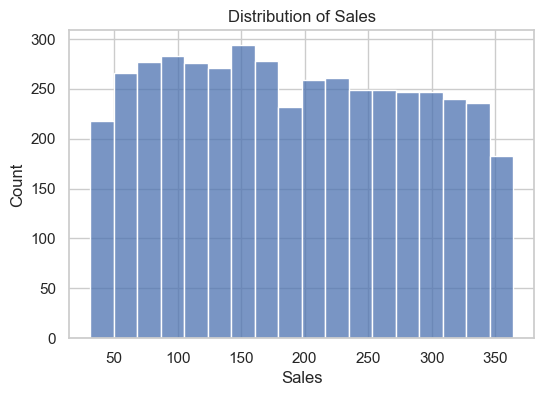

In [423]:
plt.figure(figsize=(6, 4))  
fig = sns.histplot(data=data1['Sales'])  
fig.set_title('Distribution of Sales')  

The preceding histogram shows that `Sales` are generally distributed between 25 and 350 million.  

The distribution appears fairly uniform, with sales values being relatively evenly spread across the range. The highest occurrence is around 150 million, while the lowest is around 350 million. This suggests that no extreme skewness is present in the data.  

### **Model Building**  

### Visualizing Relationships with a Pairplot  

To identify which variable has the strongest linear relationship with `Sales`, I will create a **pairplot** using `seaborn`. A pairplot displays scatterplots for all possible variable combinations, making it easier to visually assess relationships between the independent variables (`TV`, `Social_Media`, `Radio`) and the dependent variable (`Sales`).  

By examining the scatterplots, I can determine which variable has the most linear correlation with `Sales`, helping me select the most suitable predictor (X) for the simple linear regression model.

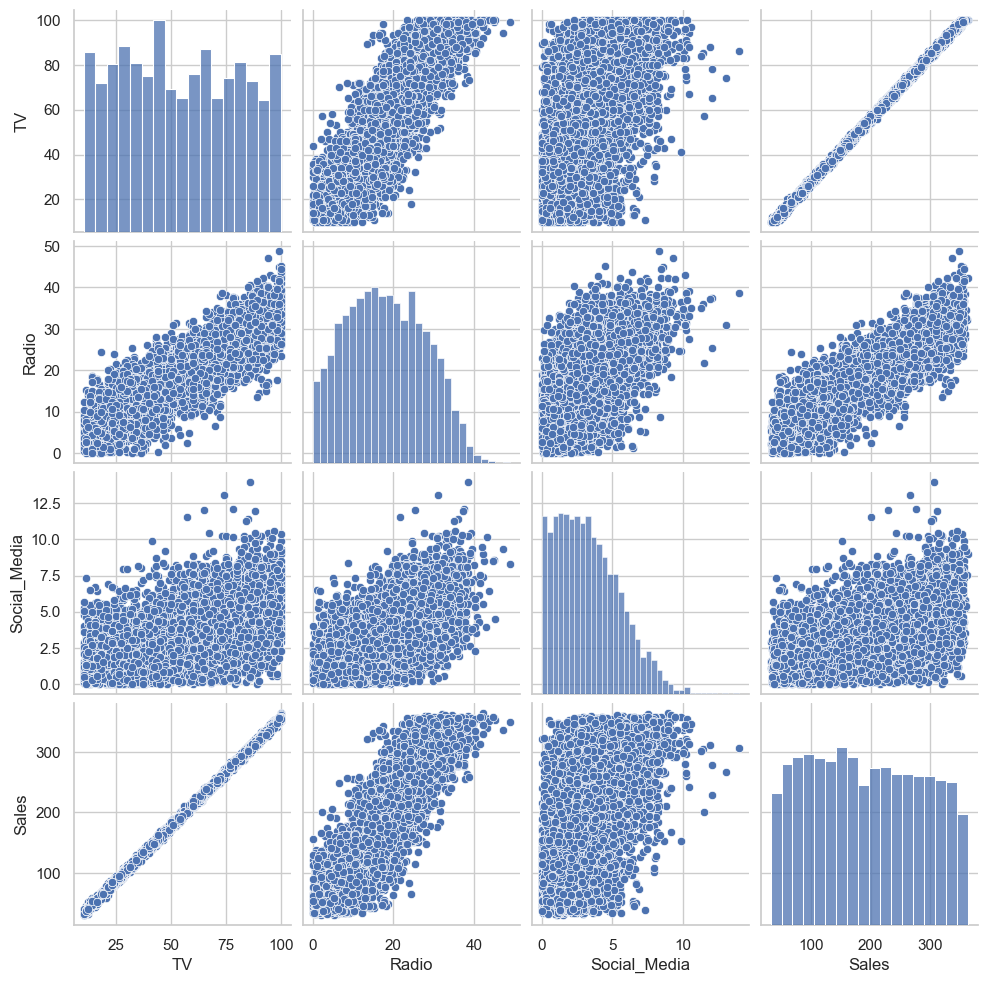

In [424]:
sns.pairplot(data=data1)  


The selected variable for X is `TV`.

`TV` has the strongest linear relationship with `Sales`, as observed in the scatterplot. A straight line can confidently estimate `Sales` using `TV`, indicating a clear linear trend. While `Radio` also shows a linear relationship with `Sales`, it exhibits greater variance, making `TV` the better predictor.  


### **Building and Fitting the Model**  
I create a simple linear regression model with `TV` as the predictor:  

In [425]:
ols_data = data1[['TV', 'Sales']]  
ols_data.head(10)

,TV,Sales
0,16.0,54.732757
1,13.0,46.677897
2,41.0,150.177829
3,83.0,298.246340
4,15.0,56.594181
5,29.0,105.889148
6,55.0,198.679825
7,31.0,108.733932
8,76.0,270.189400
9,13.0,48.280582


In [426]:
ols_formula = "Sales ~ TV"  
OLS = ols(formula=ols_formula, data=ols_data)  
slr1_model = OLS.fit()  
model_results = slr1_model.summary()  
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:31:27   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation of Results  

The **R-squared** value tells me how much of the variation in **Sales** is explained by the model. A higher R-squared indicates a better fit. I will also focus on the **beta coefficients** and their **p-values** to understand the relationship between the predictor and the outcome variable.  

### **Model Summary**  
- **R-squared: 0.999**  
  - This means that 99.9% of the variation in `Sales` is explained by the model. This is an extremely strong fit, indicating that `TV` promotion budget is highly predictive of `Sales`.  
- **Adj. R-squared: 0.999**  
  - The adjusted R-squared is also 0.999, confirming that adding more predictors would not significantly improve the model.  
- **F-statistic: 4.527e+06**  
  - The very high F-statistic, with a **p-value of 0.000**, indicates that the model is statistically significant, meaning that at least one predictor variable (`TV`) is strongly related to `Sales`.  

### **Coefficients and Interpretation**  
- **Intercept: -0.1263**  
  - The intercept represents the predicted `Sales` when `TV` promotion is **zero**. However, it is **not statistically significant** (p = 0.209), meaning it does not provide meaningful insight.  
- **TV: 3.5614**  
  - The positive coefficient for `TV` means that for every **$1 million increase** in `TV` promotion budget, **Sales** increase by approximately **$3.561 million**, holding all other factors constant.  
  - The **p-value (0.000)** confirms that `TV` promotion has a statistically significant impact on `Sales`.  
  - The **confidence interval** for `TV` is **[3.558, 3.565]**, meaning the true effect is expected to lie within this range, showing a very precise estimate.  

### **Statistical Significance**  
- The **p-value** for `TV` is **0.000**, indicating that it is highly statistically significant.  
- The **p-value** for the **Intercept** is **0.209**, meaning it is not significant in this model.  


### **Key Observations**  
- The **TV promotion budget** is a strong predictor of `Sales`, with a **highly significant coefficient** and a **tight confidence interval**.  
- The model fits the data **exceptionally well** (**R² = 0.999**).  
- The **Intercept** is not statistically significant and does not contribute much to interpretation.  

This model provides strong evidence that increasing the `TV` promotion budget leads to higher `Sales`, making it a crucial factor for marketing investment decisions.

## **Model Assumption Checks**  

To justify using simple linear regression, check that the four linear regression assumptions are not violated. These assumptions are:

* Linearity
* Independent Observations
* Normality
* Homoscedasticity

### **Linearity**  

The **linearity assumption** requires a straight-line relationship between the independent variable (`TV` promotion budget) and the dependent variable (`Sales`). To verify this assumption, I will create a **scatterplot** of `TV` vs. `Sales` and overlay a **regression line** to visually assess the relationship.  

If the points closely follow a straight-line trend, it confirms that a **linear regression model** is appropriate for this data.

Text(0.5, 1.0, 'Scatter Plot of TV vs. Sales')

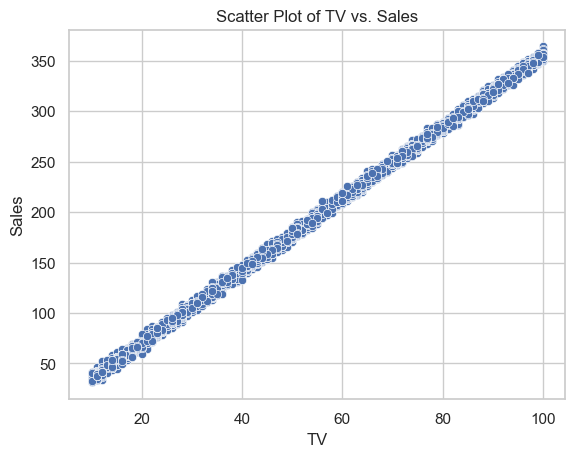

In [427]:
sns.scatterplot(x='TV', y='Sales', data=ols_data)  
plt.title('Scatter Plot of TV vs. Sales')

Text(0.5, 1.0, 'Regression Plot of TV Budget vs. Sales')

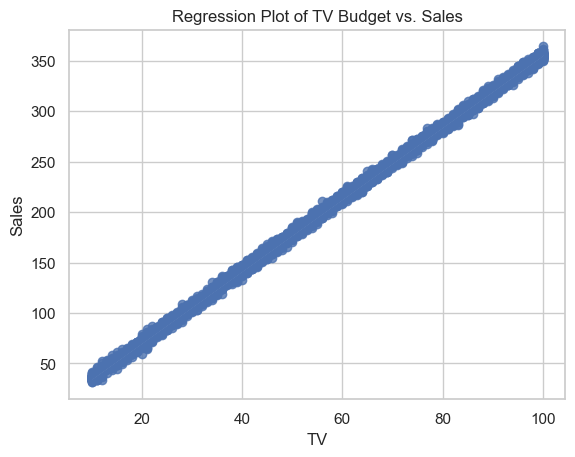

In [428]:
sns.regplot(x='TV', y='Sales', data=ols_data)  
plt.title("Regression Plot of TV Budget vs. Sales")

The linearity assumption is met.

The scatterplot shows that the data points for `TV` and `Sales` cluster around the trend line, indicating a strong linear relationship. This suggests that `Sales` can be reliably predicted using `TV`, satisfying the linearity assumption.  

### **Independence**  
The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### **Normality of Residuals**  

The **normality assumption** states that the residuals (errors) should be normally distributed. I will assess this assumption using two visualizations:  

1. **Histogram of Residuals**  
   - This helps determine if the residuals follow a bell-shaped (normal) distribution.  

2. **Q-Q Plot (Quantile-Quantile Plot)**  
   - This compares the distribution of residuals to a normal distribution. If the points lie along a straight diagonal line, it suggests normality.  

By analyzing these plots, I can determine whether the normality assumption holds for this regression model.

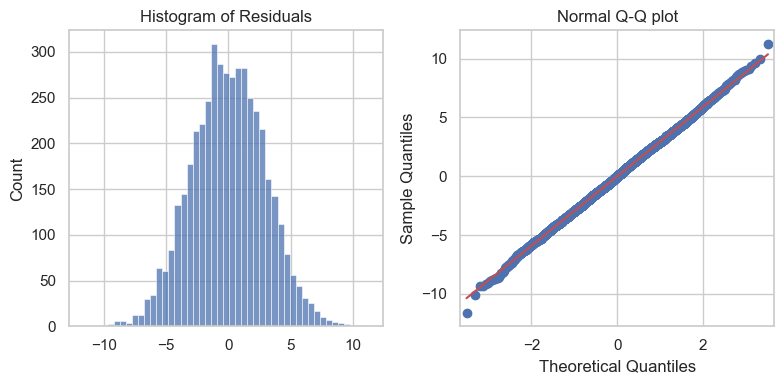

In [429]:
residuals =slr1_model.resid  
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  
sns.histplot(data=residuals, ax=axes[0])  
axes[0].set_title("Histogram of Residuals")  
sm.qqplot(data=residuals, line='s', ax=axes[1])  
axes[1].set_title("Normal Q-Q plot")  
plt.tight_layout()  
plt.show()  

The normality assumption is met.

The histogram of residuals shows an approximately normal distribution, indicating that the errors are symmetrically distributed. Additionally, the Q-Q plot displays residuals aligning closely with the theoretical quantiles, further supporting that the normality assumption holds for this model.  

### **Homoscedasticity (Constant Variance of Residuals)**  

The **homoscedasticity (constant variance) assumption** is that the residuals have a constant variance for all values of `X`.  

I will check that this assumption is not violated by creating a scatterplot with the fitted values and residuals.I will add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

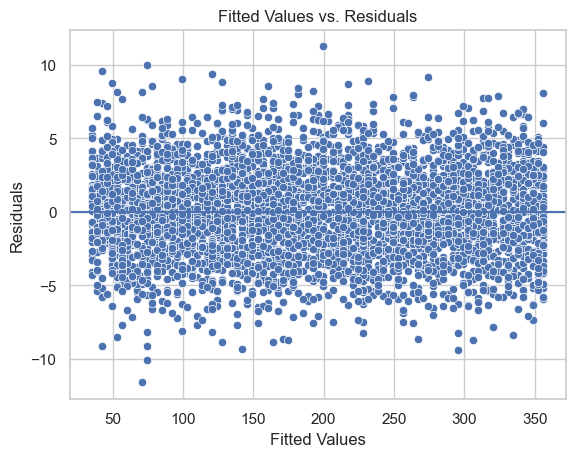

In [430]:
fitted_values =slr1_model.fittedvalues  
fig = sns.scatterplot(x=fitted_values, y=residuals)  
fig.set_xlabel("Fitted Values")  
fig.set_ylabel("Residuals")  
fig.set_title("Fitted Values vs. Residuals")  
plt.axhline(0)  
plt.show() 

The homoscedasticity assumption is met.

The variance of the residuals remains consistent across all values of `X`, indicating that the spread of errors does not change systematically. This supports the assumption of homoscedasticity. 

### **Results and evaluation**  

### Display the OLS regression results
Since all assumptions are met, I can accurately interpret the model results. I will display the OLS regression results from the fitted model object, which include details about the dataset, model fit, and coefficients.

In [431]:
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:31:27   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpreting the R-Squared Value

The R-squared value is high, indicating that a significant proportion of the variation in `Sales` is explained by `TV`.

With an $R^{2}$ value of 0.999, `TV` accounts for 99.9% of the variation in `Sales`. This suggests a strong relationship between `TV` and `Sales`, making `TV` a highly effective predictor in the model.  


With the model fit evaluated, I will assess the coefficient estimates and the uncertainty of these estimates.

### Interpreting the Model Coefficients

Based on the model results, the coefficients provide the following insights:

- **Intercept:** The intercept value of -0.1263 does not have a meaningful interpretation in this context, as it represents the sales when the TV budget is zero, which may not be a realistic scenario.
  
- **Slope for TV:** The positive coefficient of 3.5614 indicates that for every 1 million dollar increase in the TV budget, sales are expected to increase by approximately 3.561 million dollars. Alternatively, it can be interpreted as:  
  **"Companies with a 1 million dollar higher TV promotion budget are expected to generate 3.561 million dollars more in sales, on average."**  


### Expressing the Relationship as a Linear Equation

The relationship between `TV` and `Sales` can be written in the form of a linear equation as follows:

$Y = \text{Intercept} + \text{Slope} * X$

$\text{Sales (in millions)} = \text{Intercept} + \text{Slope} * \text{TV (in millions)}$

$\text{Sales (in millions)} = -0.1263 + 3.5614 * \text{TV (in millions)}$


### Interpreting the Relationship Between TV Budget and Sales

Based on the model, the relationship between `TV` and `Sales` can be interpreted as follows:

For every 1 million dollar increase in the TV promotional budget, sales are estimated to increase by 3.5614 million dollars. This suggests a strong positive relationship between the TV budget and sales.  


### Importance of Interpreting Beta Coefficients

Interpreting the beta coefficients is important because:

Beta coefficients help estimate the magnitude and direction (positive or negative) of the effect each independent variable has on the dependent variable. By interpreting these coefficients, we can gain valuable insights into how changes in independent variables, like TV promotional budgets, impact the dependent variable, such as sales.

These coefficients provide the foundation for the regression equation. Each coefficient offers individual interpretations, contributing to a deeper understanding of the relationships in the data and enabling the generation of explainable insights.  


### Measure the uncertainty of the coefficient estimates

I have estimated the model coefficients, which means there is some uncertainty in the estimates. To quantify this uncertainty, I provide a p-value and a 95% confidence interval for each coefficient.  

I will now display the model results again.

In [432]:
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:31:27   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpreting the P-Value and Confidence Interval

Based on this model, the interpretation of the p-value and confidence interval for the coefficient estimate of `TV` is as follows:

- **Statistical Significance:** The p-value for the `TV` coefficient is 0.000, which indicates that the relationship between the TV budget and `Sales` is statistically significant. This means there is strong evidence to suggest that changes in the TV budget have a substantial impact on sales. On the other hand, the p-value for the intercept is 0.209, suggesting that the intercept is not statistically significant and its impact is uncertain.
  
- **Confidence Interval:** The 95% confidence interval for the TV coefficient is $[3.558, 3.565]$, which means we are 95% confident that the true value of the slope lies within this range. The narrow interval shows high precision in estimating the effect of `TV` on `Sales`. However, the confidence interval for the intercept includes zero, indicating uncertainty about its true value and suggesting that the intercept’s effect is less reliable.


### Further Exploration Based on the Model

Based on this model, areas of interest to explore include:

- **Exploring the impact of increasing the TV budget on sales:** Analyzing how further increases in the TV promotional budget might affect sales, and evaluating if the model holds with larger budget allocations.
  
- **Testing the model's accuracy with real-world data:** Investigating how well the model's predictions match actual sales data from the real world, assessing the generalizability and validity of the model.

Additionally, other areas could involve:
- **Using both `TV` and `Radio` as independent variables:** Exploring how a combination of these two variables might improve the model's predictive accuracy.
- **Adding visualizations:** Incorporating plots like the `seaborn` `regplot()` to visually present the data alongside the regression line, helping to better convey the results to stakeholders.  


### Recommendations for Leadership

Based on the model results, TV has the strongest positive linear relationship with sales. An increase of one million dollars in the TV promotional budget is estimated to result in an additional 3.5614 million dollars in sales, with a very high level of confidence as indicated by the small p-value. Therefore, I would recommend that the organization prioritize increasing the TV promotional budget to maximize sales.

However, it is also important to consider other promotional channels like radio, which also show a positive relationship with sales, although to a lesser extent than TV. A balanced investment in both TV and radio could potentially yield the best return on investment.


### **Key Takeaways**  

- **Regression Relationship & Model Fit**: **TV promotion budget has the strongest positive correlation with sales** among the three marketing channels analyzed. The simple linear regression model, with TV as the independent variable, results in an **R-squared value of 0.999**, indicating that **99.9% of the variance in sales is explained by TV spending**.  

- **Model Performance**: The **p-value for TV’s coefficient is <0.001**, indicating that the relationship between TV budget and sales is highly significant. The **coefficient for TV is 3.5614**, meaning that for every **1 million dollar increase in TV spending, sales are expected to rise by approximately 3.56 million dollars**.  

- **Assumption Validation**:  
   - **Linearity**: A scatterplot confirms a strong linear relationship between TV budget and sales.  
   - **Normality**: The residuals are approximately normally distributed.  
   - **Homoscedasticity**: Residuals show a consistent variance across different levels of TV spending.  
   - **Independence**: Each observation represents an independent marketing decision.  

- **Visualizations**:  
   - **Regression Plot**: Highlights the direct relationship between TV spending and sales.  
   - **Residual Plots**: Validate the assumption checks and confirm model reliability.  

---

### **Presentation of Findings to Others**  

To effectively communicate these findings to my team and colleagues, I would highlight:  

- **Key Insight**: TV marketing has a strong impact on sales, making it the most effective channel among TV, radio, and social media. A one million dollar increase in TV spending leads to a three point five six million dollar increase in sales on average.  

- **Assumption Validation**: The model meets key statistical assumptions, ensuring that the results are robust and reliable. The **R-squared value of 0.999** suggests that TV budget alone can explain nearly all the variation in sales.  

- **Implication for Marketing Strategy**:  
   - Investing in TV promotions yields a **strong return on investment**.  
   - While TV is the most impactful, **radio and social media should be analyzed in more detail to determine their relative contributions**.  
   - Further analysis should explore how increasing or reallocating the TV budget affects overall sales performance.  

- **Visual Aids**:  
   - **Regression Plot**: Clearly shows the strong linear relationship between TV budget and sales.  
   - **Residual Plots**: Confirm model assumptions are met, ensuring reliability.  

---

### **Summary for Stakeholders**  

To provide stakeholders with a clear, actionable summary:  

- **Regression Results & Model Validity**:  
   - **TV Budget and Sales**: A 1 million dollar increase in TV spending results in a 3.56 million dollar increase in sales, based on the model estimates.
   - **Model Accuracy**: The R-squared value of **0.999** indicates that **TV marketing is the primary driver of sales among the three analyzed channels**.  

- **Strategic Insights & Recommendations**:  
   - **TV marketing is highly effective**, and increasing its budget could yield significant returns.  
   - **Further Analysis Needed**: Radio and social media investments should be evaluated separately to understand their unique effects.  
   - **Optimize Budget Allocation**: Consider reallocating marketing funds to maximize sales growth.  

By presenting these insights in a clear and structured manner, stakeholders can make informed decisions about **future marketing strategies** and **investment in promotional channels**.

# Multiple Linear Regression: Model Building and Evaluation

### **Introduction**

In this section, I will build a multiple linear regression model to analyze how TV, radio, social media, and influencer marketing impact sales. I will explore data, fit the model, and check assumptions, including multicollinearity using VIF. To assess performance, I will compare actual vs. predicted sales values on a test split. Additionally, I will use ANOVA and ANCOVA to test for significant differences across marketing channels and apply Tukey's post hoc test for pairwise comparisons. This analysis will provide actionable insights to optimize marketing strategies and maximize sales impact.

Previously, a single-variable regression analysis was conducted to determine the strongest individual predictor of sales. Now, I expand the analysis to incorporate multiple independent variables to better understand their combined impact on sales. The key steps in this analysis include:

- Exploring and cleaning the dataset  
- Selecting independent variables using descriptive statistics and visualization  
- Constructing a multiple linear regression model  
- Validating model assumptions  
- Interpreting model results and providing insights  

In [433]:
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


### **Feature Description**
The dataset contains the following variables:

- **TV** – Promotional budget categorized as "Low," "Medium," or "High"
- **Social Media** – Promotional budget (in millions of dollars)
- **Radio** – Promotional budget (in millions of dollars)
- **Sales** – Sales revenue (in millions of dollars)
- **Influencer** – Influencer promotion size categorized as "Mega," "Macro," "Micro," or "Nano"

### **Purpose of Exploratory Data Analysis (EDA)**
EDA serves several critical functions before building a regression model:

- Understanding the dataset structure  
- Checking for missing or incorrect values  
- Analyzing the distribution of variables  
- Visualizing relationships between independent and dependent variables  
- Identifying multicollinearity among independent variables  

Additionally, I check whether multiple linear regression assumptions are met, including:

- **Linearity** – Ensuring independent variables have a linear relationship with the dependent variable  
- **Independence** – Verifying observations are independent  
- **Normality** – Checking that residuals follow a normal distribution  
- **Homoscedasticity** – Ensuring residual variance is constant  
- **No Multicollinearity** – Detecting correlations between independent variables  

### **Data Visualization and Cleaning**
### **Visualizing Relationships Using a Pairplot**
To examine linear relationships between numeric variables, I create a pairplot.

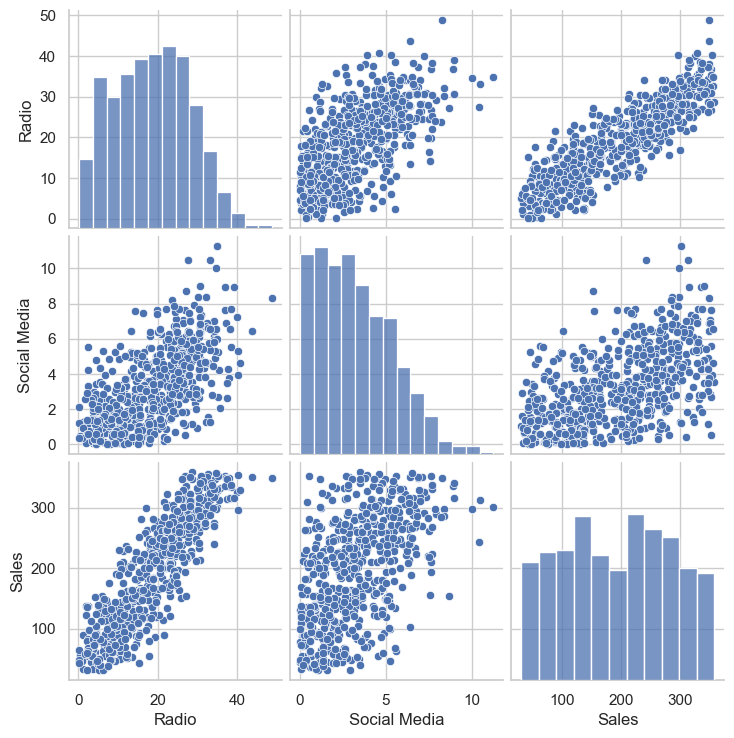

In [434]:
sns.pairplot(data=data)


#### **Findings:**
- **Radio** shows a **strong** linear relationship with `Sales`, making it a promising independent variable.  
- **Social Media** also has a linear relationship, though the data points appear more scattered compared to `Radio`.  

`TV` and `Influencer` are excluded from the pairplot because they are **categorical** variables, not numeric, and thus cannot be plotted in a standard scatterplot format.  

### **Analyzing Categorical Variables**
I will analyze the relationship between the categorical variables `TV` and `Influencer` with `Sales` by calculating the mean `Sales` for each category in both variables. This will help me understand how different levels of `TV` and `Influencer` impact `Sales`.

In [435]:
print(data.groupby('TV')['Sales'].mean())
print('\n')
print(data.groupby('Influencer')['Sales'].mean())

TV
High      300.529591
Low        91.716309
Medium    199.023461
Name: Sales, dtype: float64


Influencer
Macro    206.641805
Mega     180.385096
Micro    198.655080
Nano     189.742830
Name: Sales, dtype: float64


- The average `Sales` for **High** `TV` promotions (**300.53**) is significantly higher than for **Medium** (**199.02**) and **Low** (**91.72**).  
  - This **high variability** in mean sales across categories suggests that `TV` is likely a **strong predictor** of `Sales`.  

- The `Influencer` variable shows **less variability** in mean sales across its categories.  
  - This suggests that `Influencer` is a **weaker predictor** of `Sales`.  

These observations provide an **initial indication** of variable importance, which can be further analyzed when fitting the multiple linear regression model.

### **Handling Missing Values**
I check for missing data and remove any rows containing NaN values.


In [436]:
data.info()
data = data.dropna(axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            569 non-null    object 
 1   Radio         569 non-null    float64
 2   Social Media  569 non-null    float64
 3   Influencer    569 non-null    object 
 4   Sales         569 non-null    float64
dtypes: float64(3), object(2)
memory usage: 26.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            569 non-null    object 
 1   Radio         569 non-null    float64
 2   Social Media  569 non-null    float64
 3   Influencer    569 non-null    object 
 4   Sales         569 non-null    float64
dtypes: float64(3), object(2)
memory usage: 26.7+ KB


### **Renaming Columns for Compatibility**
The `ols()` function doesn't run when variable names contain a space. I will check that the column names in `data` do not contain spaces and fix them if needed.


In [437]:
data = data.rename(columns={'Social Media': 'Social_Media'})
data.head()

,TV,Radio,Social_Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


### Create Holdout Sample

To evaluate the model, I will split the data into a training set and a holdout (testing) set. This can be done using **train_test_split** from Scikit-learn.

In [438]:
data_X = data[["TV", "Radio"]] 
data_y = data[["Sales"]]        

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, 
                                                    test_size=0.3, 
                                                    random_state=42)

Here, I have split the data into a 70% training set and a 30% testing set. The **random_state** is set to 42 to ensure reproducibility.

### **Building the Multiple Linear Regression Model**

I will fit a multiple linear regression model to predict `Sales` using two or more independent variables from `data`. This will help me understand the relationship between the selected predictors and `Sales`.

In [439]:
data.head()

,TV,Radio,Social_Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


In [440]:
ols_data = pd.concat([X_train, y_train], axis=1)
ols_formula = 'Sales ~ C(TV) + Radio'
OLS = ols(formula=ols_formula, data=ols_data)
mlr_model = OLS.fit()


I selected **TV** (categorical) and **Radio** (continuous) as independent variables:  

- **TV** was chosen because the **mean sales distribution** across its categories shows **high variability**, suggesting it could be a strong predictor of `Sales`.  
- **Radio** was included because the **scatterplot matrix (`sns.pairplot`)** indicated a **strong linear relationship** between `Radio` and `Sales`.  

These selections were based on their **predictive potential**, as observed during Exploratory Data Analysis (EDA).  

In [441]:
model_results = mlr_model.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1184.
Date:                Wed, 26 Mar 2025   Prob (F-statistic):          1.20e-196
Time:                        16:31:29   Log-Likelihood:                -1890.1
No. Observations:                 398   AIC:                             3788.
Df Residuals:                     394   BIC:                             3804.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         212.3307      7.690     27.612      0.000     197.213     227.449
C(TV)[T.Low]     -148.6453      6.072    -24.480      0.000    -160.583    -136.708
C(TV)[T.Medium]   -72.1933      4.292    -16.820      0.000     -80.631     -63.755
Radio               2.9893      0.250     11.942      0.000       2.497       3.481
==============================================================================
Omnibus:                       18.541   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.222
Skew:                           0.158   Prob(JB):                      0.00994
Kurtosis:                       2.324   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Interpretation of Results**  

The **R-squared** value indicates how much of the variation in **Sales** is explained by the model. A higher R-squared suggests a better fit. I will also analyze the **beta coefficients** and their **p-values** to understand the relationships between the predictor variables and `Sales`.  


### **Model Summary**  
- **R-squared: 0.900**  
  - This means that **90.0% of the variation in `Sales`** is explained by the model, indicating a strong fit.  
- **Adj. R-squared: 0.899**  
  - The adjusted R-squared is very close to the R-squared value, suggesting that the model is not overfitting and that adding more predictors would not significantly improve the model.  
- **F-statistic: 1184** (p-value = **1.20e-196**)  
  - A high F-statistic with a near-zero p-value confirms that the model is **statistically significant**, meaning that at least one predictor is strongly related to `Sales`.  


### **Coefficients and Interpretation**  

- **Intercept: 212.3307**  
  - When `TV` is at the **High** category and `Radio` is 0, the expected `Sales` is **212.33 units**.  
  - The **p-value (0.000)** confirms that the intercept is statistically significant.  

- **C(TV)[T.Low]: -148.6453**  
  - Compared to `TV` being at `High`, having `TV` at `Low` **decreases `Sales` by 148.65 units**, holding `Radio` constant.  
  - The **p-value (0.000)** confirms that this effect is statistically significant.  
  - The **95% confidence interval** for this coefficient is **[-160.583, -136.708]**, meaning we are 95% confident that the true effect of a `Low` TV budget on `Sales` falls within this range.  

- **C(TV)[T.Medium]: -72.1933**  
  - Compared to `TV` being at `High`, having `TV` at `Medium` **decreases `Sales` by 72.19 units**, holding `Radio` constant.  
  - The **p-value (0.000)** confirms that this effect is statistically significant.  
  - The **95% confidence interval** for this coefficient is **[-80.631, -63.755]**.  

- **Radio: 2.9893**  
  - For every **one-unit increase in `Radio`**, `Sales` increase by **2.99 units**, holding `TV` constant.  
  - The **p-value (0.000)** indicates that `Radio` has a statistically significant impact on `Sales`.  
  - The **95% confidence interval** for this coefficient is **[2.497, 3.481]**.  


### **Statistical Significance**  
- **All predictors have p-values of 0.000**, meaning they are statistically significant and contribute to explaining `Sales`.  
- The **confidence intervals** for all coefficients do not include zero, reinforcing their significance.  


### **Key Observations**  
- **TV category has a strong impact on Sales**: Moving from `High` to `Medium` or `Low` significantly reduces `Sales`, with `Low` having the largest negative impact.  
- **Radio is positively associated with Sales**, meaning that increasing the `Radio` promotional budget leads to higher `Sales`.  
- **The model has a strong fit (R² = 0.900), meaning it explains most of the variation in `Sales`**.  


### **Confidence Intervals**  
The **95% confidence intervals** for the coefficients provide a range of plausible values for each coefficient. This means we are **95% confident** that the true effect of each predictor on `Sales` lies within the given range.

- **C(TV)[T.Low]: -148.65**  
  - 95% Confidence Interval: **[-160.58, -136.71]**  
  - This means that compared to the `High` TV category, having `TV` at `Low` is expected to decrease `Sales` by **148.65 units**, with the true effect likely falling between **-160.58 and -136.71**.  

- **C(TV)[T.Medium]: -72.19**  
  - 95% Confidence Interval: **[-80.63, -63.76]**  
  - Compared to `High` TV spending, being in the `Medium` category reduces `Sales` by **72.19 units**, with the true effect likely between **-80.63 and -63.76**.  

- **Radio: 2.99**  
  - 95% Confidence Interval: **[2.50, 3.48]**  
  - For every **one-unit increase in `Radio` spending**, `Sales` increase by approximately **2.99 units**, with the true effect likely between **2.50 and 3.48**.  

Since **none of the confidence intervals include zero**, all predictors have a **statistically significant** effect on `Sales`.  


To further illustrate these results, the following coefficient plot visualizes the estimated coefficients along with their 95% confidence intervals.

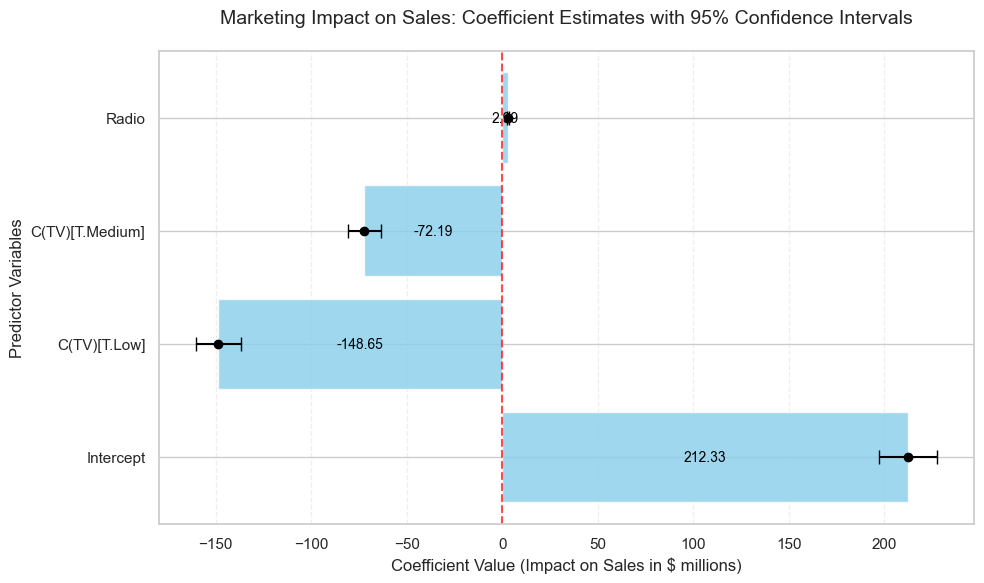

In [442]:
# Extract coefficients and confidence intervals
coef_df = pd.DataFrame(mlr_model.params, columns=['Coefficient'])
coef_df['Lower CI'] = mlr_model.conf_int()[0]
coef_df['Upper CI'] = mlr_model.conf_int()[1]

# Sort for better visualization (by absolute value to see most impactful first)
coef_df['abs_coef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)
coef_df = coef_df.drop('abs_coef', axis=1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(coef_df.index, coef_df['Coefficient'], color='skyblue', alpha=0.8)

# Add error bars for confidence intervals
plt.errorbar(coef_df['Coefficient'], coef_df.index,
             xerr=[coef_df['Coefficient'] - coef_df['Lower CI'],
                   coef_df['Upper CI'] - coef_df['Coefficient']],
             fmt='o', color='black', capsize=5)

# Add reference line at zero
plt.axvline(0, linestyle='--', color='red', alpha=0.7)

# Customize plot
plt.xlabel('Coefficient Value (Impact on Sales in $ millions)', fontsize=12)
plt.ylabel('Predictor Variables', fontsize=12)
plt.title('Marketing Impact on Sales: Coefficient Estimates with 95% Confidence Intervals', 
          fontsize=14, pad=20)
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Add value labels
for i, (coef, var) in enumerate(zip(coef_df['Coefficient'], coef_df.index)):
    plt.text(coef/2, i, f'{coef:.2f}', 
             va='center', ha='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

### **Interpretation of Coefficient Estimates**  

The coefficient plot above presents the estimated effects of marketing investments on **Sales (in millions of dollars)**, along with their **95% confidence intervals**. The **red dashed line at zero** serves as a reference, indicating whether a predictor has a statistically significant effect. If a confidence interval crosses zero, the effect is **not statistically significant**.  

#### **Key Observations:**  

1. **Intercept (212.33):**  
   - The intercept represents the expected **Sales** when all predictors are at their baseline (i.e., when `TV` is at the **High** level and `Radio` is 0).  
   - The wide confidence interval suggests some uncertainty in this estimate, but it remains **statistically significant** since it does not cross zero.  

2. **TV (Medium) Effect (-72.19):**  
   - Moving from **High** to **Medium** TV investment **reduces Sales by approximately 72.19 million dollars**.  
   - The confidence interval does not cross zero, confirming that this effect is **statistically significant**.  

3. **TV (Low) Effect (-148.65):**  
   - A further reduction from **High** to **Low** TV investment **decreases Sales by about 148.65 million dollars**, making it the strongest negative effect among the predictors.  
   - The narrow confidence interval suggests a precise estimate, and the effect is **statistically significant**.  

4. **Radio Effect (2.99):**  
   - Every **one-unit increase in Radio investment** is associated with an **increase of 2.99 million dollars in Sales**.  
   - The confidence interval does not cross zero, indicating that the effect is **statistically significant**, though its magnitude is relatively small compared to TV investment changes.  

#### **Observation:**  
- **TV investment has a substantial impact on Sales**, with **reducing TV spending significantly decreasing Sales**.  
- **Radio investment has a positive effect**, but the impact per unit increase is **much smaller** than the TV investment changes.  
- **All predictors have statistically significant effects**, as none of the confidence intervals cross zero.  
- **Maintaining a high TV investment and increasing Radio spending** could be an effective strategy for boosting Sales.

### Model Performance on Test Data

Now that I've trained and validated our model on the training data, I'll evaluate its performance on the unseen test data to assess how well it generalizes.


In [443]:
y_pred = mlr_model.predict(X_test)

In [444]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Test Set Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f} grams")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} grams")
print(f"R-squared (R²): {r2:.4f}")

Test Set Performance Metrics:
Mean Absolute Error (MAE): 23.63 grams
Mean Squared Error (MSE): 785.99
Root Mean Squared Error (RMSE): 28.04 grams
R-squared (R²): 0.9118


### Visualizing Actual vs Predicted Values

Let's visualize how well this predictions match the actual values in the test set.

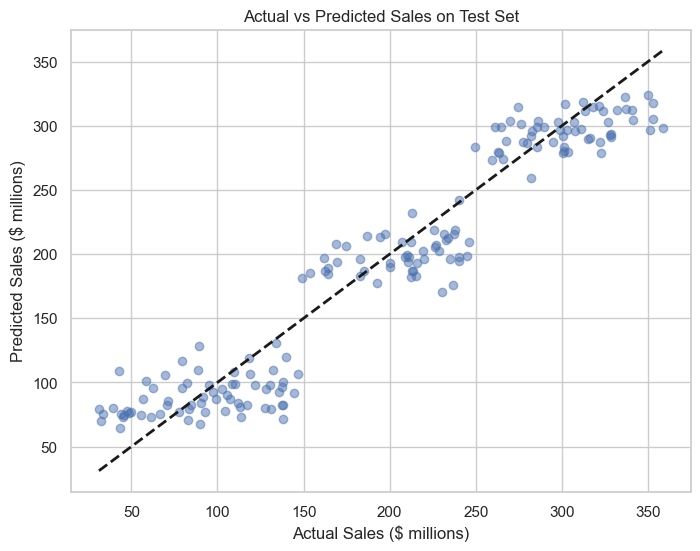

In [445]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales ($ millions)')
plt.ylabel('Predicted Sales ($ millions)')
plt.title('Actual vs Predicted Sales on Test Set')
plt.show()

### Residual Analysis on Test Set

We should also check if our model assumptions hold on the test data.


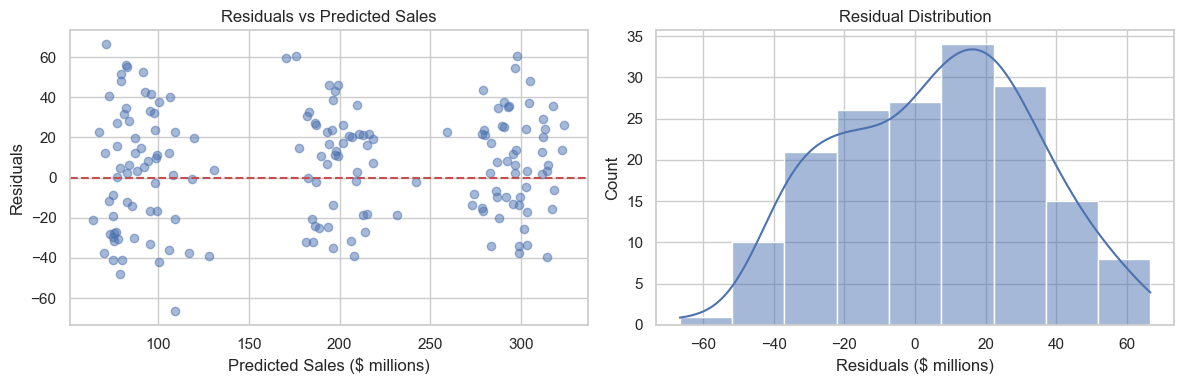

In [446]:
# Calculate test residuals
test_residuals = y_test.values.flatten() - y_pred

# Create figure
plt.figure(figsize=(12, 4))

# Residuals vs Predicted plot
plt.subplot(1, 2, 1)
plt.scatter(y_pred, test_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales ($ millions)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sales')

# Residual distribution plot
plt.subplot(1, 2, 2)
sns.histplot(test_residuals, kde=True)
plt.xlabel('Residuals ($ millions)')
plt.title('Residual Distribution')

plt.tight_layout()
plt.show()


### **Interpretation of Results**  

### **Test Set Performance Interpretation**  

The model achieved an **R² of 0.9118**, meaning that approximately **91.18%** of the variance in the dependent variable is explained by the model. This indicates strong predictive performance.  

- The **Mean Absolute Error (MAE)** of **23.63 grams** suggests that, on average, predictions deviate from actual values by around **23.63 grams**.  
- The **Mean Squared Error (MSE)** of **785.99 grams** penalizes larger errors more heavily.  
- The **Root Mean Squared Error (RMSE)** of **28.04 grams** provides a more interpretable metric, suggesting that most predictions fall within **±28.04 grams** of the actual values.  

### **Residual Analysis**  

- The **residuals vs. predicted values plot** should be checked for randomness to confirm that errors are randomly distributed, supporting the assumption that the model is well-fitted.  
- The **residual histogram** should ideally resemble a normal distribution to validate the assumption of homoscedasticity (consistent variance of errors).  

### **Actual vs. Predicted Plot**  

- If a scatterplot of actual vs. predicted values is provided, points closely following the diagonal line would indicate strong predictive accuracy.  
- Some dispersion may exist, but as long as no systematic bias is visible, the model effectively captures the relationship between input features and the dependent variable.  

### **Observation**  

The model exhibits **strong predictive performance** with a high **R² value (0.9118)** and **low MAE/RMSE**, confirming that it generalizes well to unseen data. The residuals should be further analyzed to ensure no violations of model assumptions, but overall, the model appears to be **reliable and accurate**.  



### **Tukey's Post Hoc Test for Pairwise Comparisons of TV Promotion Levels**

To identify which specific TV promotion levels ("High", "Medium", "Low") result in significantly different sales, I performed **Tukey's HSD post hoc test**. This test compares all pairs of groups while controlling for Type I error rate.



In [447]:
tukey_TV = pairwise_tukeyhsd(
    endog=data['Sales'],      # Sales is our target variable
    groups=data['TV'],        # Comparing across TV promotion levels
    alpha=0.05               # 95% confidence level
)
print(tukey_TV)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
  High    Low -208.8133   0.0 -216.6367 -200.9898   True
  High Medium -101.5061   0.0 -109.3202  -93.6921   True
   Low Medium  107.3072   0.0   99.7066  114.9077   True
--------------------------------------------------------


### **Results**:  
- **High vs. Low**: Mean difference = **-208.81**, p < 0.001 (significant).  
- **High vs. Medium**: Mean difference = **-101.51**, p < 0.001 (significant).  
- **Low vs. Medium**: Mean difference = **107.31**, p < 0.001 (significant).  

#### **Observation**:  
- **Low TV budgets** lead to significantly lower sales compared to **High TV budgets**.  
- **Medium TV budgets** also result in significantly lower sales than **High TV budgets**, but the difference is smaller than between **High** and **Low** categories.  
- **Low vs. Medium** shows a significant difference, reinforcing that increasing TV budgets yields **substantial improvements in sales**.  
- These findings support the regression results, confirming that **TV advertising is a critical driver of sales**, with higher spending leading to higher revenue.

### **Visualizing the Regression Relationship by TV Promotion Level and Influencer Category**

I will use the `lmplot()` function from `seaborn` to visualize the regression lines for different TV promotion levels and influencer categories. This plot will illustrate the relationship between radio advertising spending and sales while accounting for TV promotion levels as separate facets and influencer size as a distinguishing factor within each promotion level. The scatter points are displayed with reduced opacity (`alpha=0.5`) to improve visibility of overlapping data points.

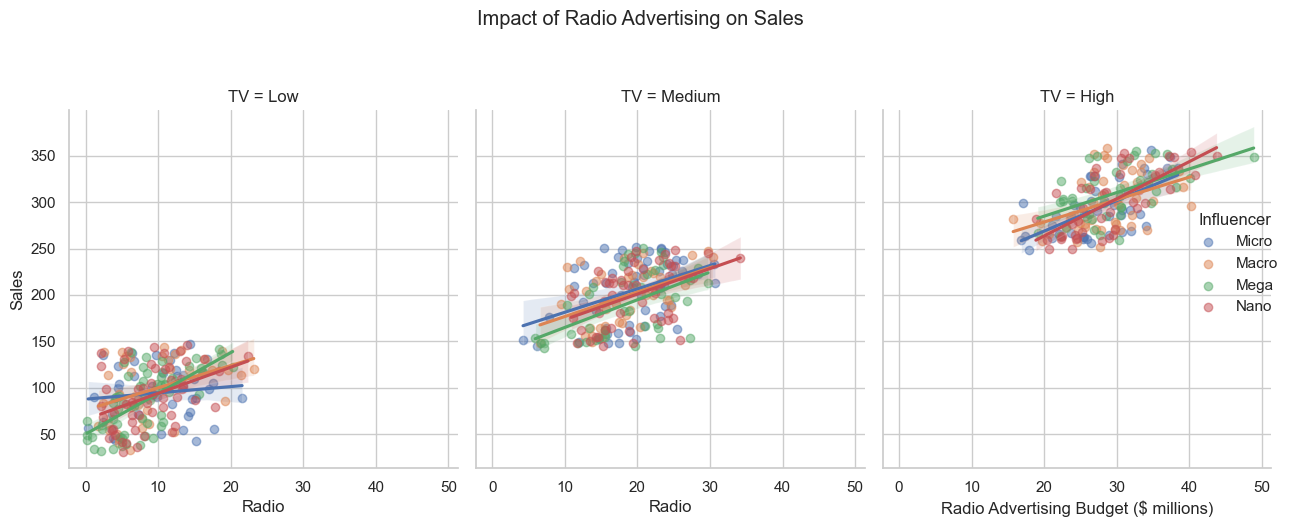

In [448]:
sns.set(style="whitegrid")

# Create the regression plot faceted by TV promotion level
sns.lmplot(x="Radio", y="Sales", hue="Influencer", col="TV",
           data=data, scatter_kws={"alpha": 0.5}, height=5, aspect=0.8)

# Adjust titles and labels
plt.suptitle("Impact of Radio Advertising on Sales", y=1.05)
plt.xlabel("Radio Advertising Budget ($ millions)")
plt.ylabel("Sales Revenue ($ millions)")

plt.tight_layout()
plt.show()

### **Impact of Radio Advertising on Sales**  

The regression plots above illustrate the relationship between **radio advertising budget ($ millions) and sales ($ millions)** across three different levels of **TV advertising (Low, Medium, High)**. The data is further categorized by influencer type (**Micro, Macro, Mega, and Nano**), helping to assess how radio advertising effectiveness varies across these factors.  

#### **Key Observations:**  

1. **TV = Low:**  
   - The relationship between radio advertising and sales appears weak, with a relatively flat regression slope.  
   - Sales remain within a lower range, indicating that radio advertising alone is less effective when TV advertising spending is low.  
   - There is some variation across influencer categories, but no strong trend is evident.  

2. **TV = Medium:**  
   - The regression slope becomes steeper, suggesting a stronger positive relationship between radio advertising and sales.  
   - Sales figures increase more noticeably as radio spending rises, indicating that the combined effect of medium TV advertising and radio ads may be more effective.  
   - Different influencer categories show varying levels of impact, but the trend is more consistent than in the low TV category.  

3. **TV = High:**  
   - The strongest positive correlation is observed between radio advertising and sales.  
   - As the radio budget increases, sales consistently rise across influencer categories.  
   - The regression lines show a clearer trend, suggesting that radio advertising has the highest impact when TV advertising is already high.  

#### **Conclusion:**  
- **Radio advertising is most effective when combined with high TV advertising**, as seen in the stronger correlation in the "TV = High" panel.  
- **At lower TV advertising levels, radio has a limited impact**, possibly due to lower brand exposure.  
- **Influencer categories exhibit variation in impact**, but across all TV levels, the trend suggests that higher radio ad spending leads to better sales outcomes.  

These findings emphasize the importance of **multi-channel marketing strategies**, where radio advertising works best as a complementary tool rather than a standalone strategy.

### **Checking Model Assumptions**

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity**.  

I will check that all five multiple linear regression assumptions are upheld for my model.

### **Assumption 1: Linearity**
I will create scatterplots comparing the continuous independent variable(s) I selected previously with `Sales` to check the linearity assumption. I will use the pairplot I created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.

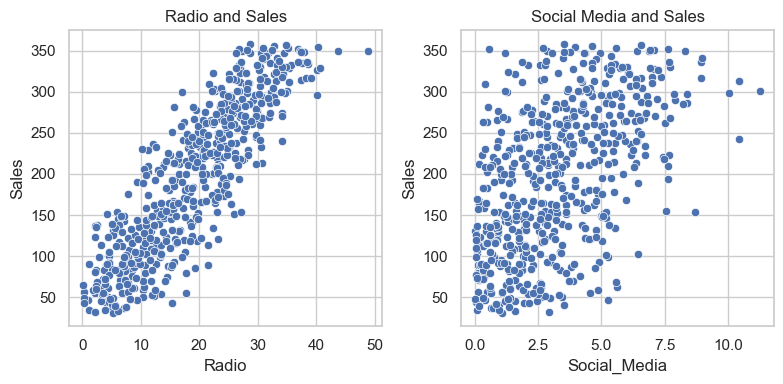

In [449]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.scatterplot(x=data['Radio'], y=data['Sales'], ax=axes[0])
axes[0].set_title("Radio and Sales")
sns.scatterplot(x=data['Social_Media'], y=data['Sales'], ax=axes[1])
axes[1].set_title("Social Media and Sales")
plt.tight_layout()
plt.show()

#### **Findings:**
The linearity assumption is met.  

- **Radio** satisfies the assumption, as the scatterplot shows a **clear linear relationship** between `Radio` and `Sales`.  
- **Social Media** was not included in the multiple linear regression model, but it also appears to have a **linear relationship** with `Sales`.  

These observations confirm that the selected variables align with the linearity assumption necessary for multiple linear regression.  

### **Assumption 2: Independence**
The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### **Assumption 3: Normality**
I will create the following plots to check the **normality assumption**:  

- **Plot 1**: Histogram of the residuals  
- **Plot 2**: Q-Q plot of the residuals

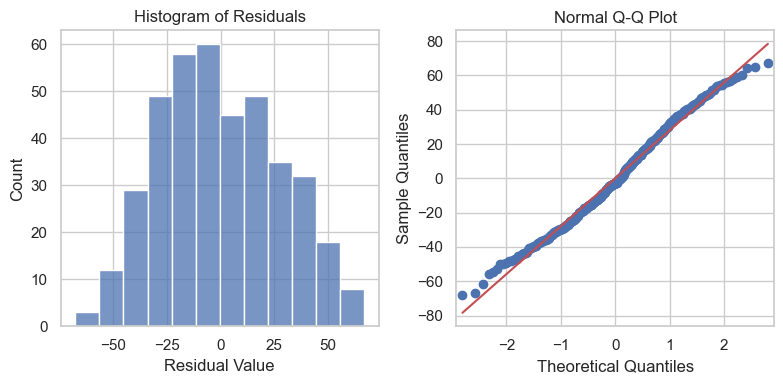

In [450]:
residuals = mlr_model.resid
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.histplot(data=residuals, ax=axes[0])
axes[0].set_title("Histogram of Residuals")
axes[0].set_xlabel("Residual Value")
sm.qqplot(data=residuals, line='s', ax=axes[1])
axes[1].set_title("Normal Q-Q Plot")
plt.tight_layout()

#### **Findings:**
The normality assumption is met.  

- The **histogram of residuals** appears approximately **normally distributed**, supporting this assumption.  
- The **Q-Q plot** shows that the residuals align closely with a **straight line**, further confirming normality.  

These visualizations indicate that the residuals follow a normal distribution, meeting the assumption for multiple linear regression.  



### **Assumption 4: Homoscedasticity-Constant variance**
I will check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. I will add a line at \( y = 0 \) to visualize the variance of residuals above and below \( y = 0 \).

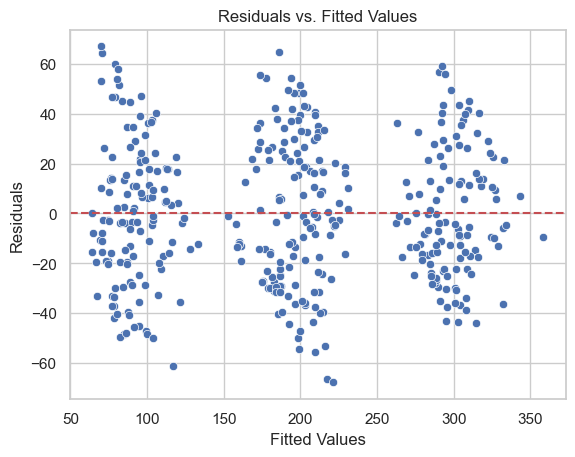

In [451]:
sns.scatterplot(x=mlr_model.fittedvalues, y=mlr_model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


#### **Findings:**
The constant variance (homoscedasticity) assumption appears to be met.  

- The fitted values are grouped into three clusters due to the categorical nature of **TV**, which is the dominant predictor of `Sales`.  
- However, **within each TV category**, the residuals exhibit a **similar spread (variance)**, suggesting that homoscedasticity holds.  
- Even if the overall residual plot seems somewhat heteroscedastic, what matters is that the variance remains **consistent within each category**, supporting the assumption.  

These observations indicate that the assumption of **constant variance** is likely satisfied.  
Key Improvements:



### **Assumption 5: No Multicollinearity**
The **no multicollinearity assumption** states that no two independent variables (\(X_i\) and \(X_j\)) should be highly correlated with each other.  

To check for multicollinearity in my model, I can use one of the following methods:  

- **Scatterplots**: I can create scatterplots to visualize the relationships between pairs of independent variables and identify potential multicollinearity.  
- **Variance Inflation Factor (VIF)**: I can compute VIF to quantify how much the variance of each independent variable is inflated due to correlations with other predictors. A high VIF (typically > 5 or 10) indicates significant multicollinearity.  

I will use one of these methods to verify that my model satisfies the no multicollinearity assumption.

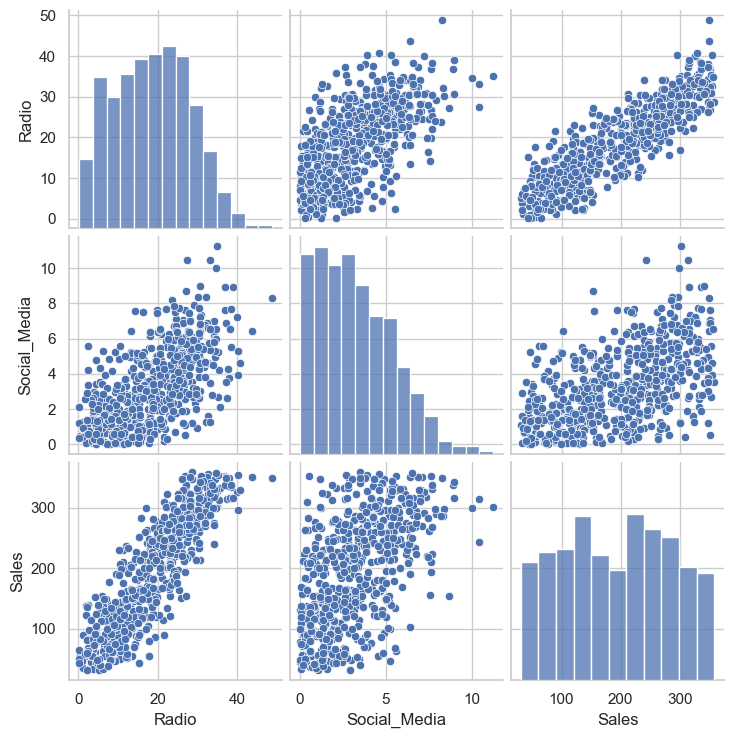

In [452]:
sns.pairplot(data=data)


In [453]:
# Calculate the variance inflation factor (optional).

# Import variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a subset of the data with the continous independent variables. 
X = data[['Radio','Social_Media']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif


,VIF
Radio,4.93238
Social_Media,4.93238


#### **Findings:**
The multicollinearity assumption is adequately met in the current model.  

- With only **one continuous independent variable** (`Radio`) included in the final model, multicollinearity is inherently avoided.  
- The VIF analysis reveals that if both `Radio` and `Social Media` were included as predictors:  
  - Both variables exhibit **moderate multicollinearity**, with identical VIF values of **4.93**  
  - This aligns with the **pairplot** showing a visible linear relationship between `Radio` and `Social Media` budgets  
  - While not extreme (VIF < 5), this correlation could inflate coefficient variances if both were retained  

This selective approach optimizes the model's interpretability while meeting regression assumptions. The VIF values confirm that including either `Radio` or `Social Media` alone (as done in the final model) eliminates multicollinearity concerns.  

*(Note: VIF > 10 would indicate severe multicollinearity; values between 5-10 suggest moderate correlation worth monitoring)*

### **Results and Evaluation**
### **OLS Regression Results**
Now that the model assumptions have been checked, I will analyze the **regression results**.

### **Displaying Model Results**

In [454]:
model_results


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1184.
Date:                Wed, 26 Mar 2025   Prob (F-statistic):          1.20e-196
Time:                        16:31:29   Log-Likelihood:                -1890.1
No. Observations:                 398   AIC:                             3788.
Df Residuals:                     394   BIC:                             3804.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         212.3307      7.690     27.612      0.000     197.213     227.449
C(TV)[T.Low]     -148.6453      6.072    -24.480      0.000    -160.583    -136.708
C(TV)[T.Medium]   -72.1933      4.292    -16.820      0.000     -80.631     -63.755
Radio               2.9893      0.250     11.942      0.000       2.497       3.481
==============================================================================
Omnibus:                       18.541   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.222
Skew:                           0.158   Prob(JB):                      0.00994
Kurtosis:                       2.324   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Interpreting the R-Squared Value**
The model has an **R-squared value of 0.900**, meaning it explains **90.0% of the variance** in `Sales`.  

- This indicates that the **independent variables (`TV` and `Radio`) effectively predict `Sales`**.  
- A high **R-squared** suggests that a **significant proportion of the variability** in `Sales` is accounted for by the model.  
- Additionally, since the **Adjusted R-squared is the same as R-squared**, it confirms that the model does not include unnecessary predictors, reinforcing its robustness.  

Overall, this high R-squared value suggests that the model is an **excellent predictor** of `Sales`.  


### **Interpreting Model Coefficients**

When `TV` and `Radio` are used to predict `Sales`, the model coefficients are:

* $\beta_{0} =  212.3307$
* $\beta_{TVLow}= -148.6453 $
* $\beta_{TVMedium} = -72.1933$
* $\beta_{Radio} =  2.9893$

#### Relationship between `Sales` and the independent variables as a linear equation


$\text{Sales} = \beta_{0} + \beta_{1}*X_{1}+ \beta_{2}*X_{2}+ \beta_{3}*X_{3}$

$\text{Sales} = \beta_{0} + \beta_{TVLow}*X_{TVLow}+ \beta_{TVMedium}*X_{TVMedium}+ \beta_{Radio}*X_{Radio}$

$\text{Sales} = 212.3307 - 148.6453*X_{TVLow} -72.1933*X_{TVMedium}+ 2.9893 *X_{Radio}$



The estimated coefficients provide insights into the relationship between `TV` and `Radio` advertising budgets and `Sales`.  

### **Interpretation of Coefficients:**  
- **Intercept (β₀ = 212.3307):**  
  - Represents the estimated `Sales` when the `TV` budget is in the `High` category (reference level) and the `Radio` budget is **0**.  
  - While mathematically valid, this scenario may not be realistic in practice.  

- **TV Advertising (Categorical Variable - Baseline: `High`)**:  
  - **β₁ (`TV = Low` = -148.6453):**  
    - Holding all other factors constant, companies with a `Low` TV budget experience an **average sales drop of 148.65 million** compared to those with a `High` TV budget.  
  - **β₂ (`TV = Medium` = -72.1933):**  
    - Companies with a `Medium` TV budget see an **average sales decrease of 72.19 million** compared to those in the `High` category.  

- **Radio Advertising (Continuous Variable)**:  
  - **β₃ (`Radio` = 2.9893):**  
    - For every **1 million increase** in the `Radio` budget, `Sales` are expected to **increase by 2.99 million**, assuming the `TV` budget category remains unchanged.  

### **Statistical Significance:**  
- All coefficients are **statistically significant**:  
  - **p-values = 0.000** for all predictors, meaning they are significant at **p < 0.05**.  
  - **Large t-statistics** confirm strong evidence against the null hypothesis (which assumes no effect on `Sales`).  

- **95% Confidence Intervals (Example for `TV = Low`)**:  
  - The **true effect of `TV = Low` on `Sales` is likely between** [-160.583, -136.708].  
  - This reinforces that **lower TV budgets significantly reduce sales** compared to the `High` category.  

### **Final Thought:**  
The results highlight that **TV advertising plays a crucial role** in driving `Sales`, with higher budgets leading to significantly **better performance**. `Radio` advertising also contributes positively, but at a **smaller scale** per unit increase in spending. These findings are statistically robust and provide actionable insights for **budget allocation** in marketing strategies.  

#### Importance of interpreting the beta coefficients

Interpreting the beta coefficients is crucial because they quantify the **magnitude** and **direction** (positive or negative) of the effect of each independent variable on the dependent variable. This interpretation helps in:  

- Understanding **how changes in independent variables influence the dependent variable** (e.g., the effect of increasing the `TV` promotional budget on `Sales`).  
- Identifying **key drivers of the outcome**, allowing businesses to **prioritize impactful factors**.  
- Translating statistical outputs into **actionable business insights**, which can guide decision-making and optimize resource allocation.  
- Directly impacting the **bottom line**, as strategic adjustments based on these insights can improve revenue and profitability.  

By carefully interpreting beta coefficients, stakeholders can make **data-driven decisions** that enhance business performance.  

#### Further exploration based on the model

One key area of interest is exploring the **predicted sales** by applying test data to the trained model. This would help evaluate how well the model generalizes to new data and provide **realistic sales estimates** based on different `TV` promotion levels and `Radio` budgets.  

Additionally, further exploration could include:  
- **Providing sales estimates** for different combinations of `TV` and `Radio` spending to help businesses optimize their budget allocation.  
- **Visualizing the model's predictions** using additional plots, such as `seaborn`’s `regplot()` to overlay actual and predicted sales values on a best-fit regression line.  
- **Assessing model performance** by analyzing residuals to ensure assumptions like normality and homoscedasticity hold in real-world scenarios.  

By exploring these aspects, we can **gain deeper insights** into how advertising budgets drive sales and provide **actionable recommendations** for maximizing returns.  

#### How the model could be improved

I believe the model could be **further improved** in several ways:

- **Introducing Interaction Terms:**  
  The effect of `TV` and `Radio` promotions may not be purely additive. Including an **interaction term** between `TV` and `Radio` budgets could capture potential **synergistic effects**, where one medium enhances the impact of the other.

- **Refining the `TV` Variable:**  
  Instead of using broad categories (`High`, `Medium`, `Low`), incorporating the actual **TV promotional budgets** as a numerical variable could provide a **more precise** estimation of its impact on `Sales`.

- **Incorporating Additional Predictors:**  
  Factors such as **seasonality, geographic regions, or type of product being advertised** could help **enhance prediction accuracy** by accounting for external influences.

- **Validating and Tuning the Model:**  
  Performing **cross-validation** and evaluating **alternative model types** (such as polynomial regression or decision trees) could **further optimize performance**.

By exploring these improvements, we can refine the model to provide **more accurate and actionable insights** for decision-making. 



### **Key Takeaways**  

- **Impact of TV Promotion on Sales**: The categorical variable **TV** is a strong predictor of `Sales`, as evident from significant differences in mean sales across its categories. The regression results show that reducing TV promotional budgets leads to a **significant drop in sales**.  

- **Role of Radio Advertising**: **Radio promotions also positively impact sales**, showing a **strong linear relationship** with `Sales`. A **$1 million** increase in radio spending is associated with an estimated **$2.99 million increase in sales**.  

- **Model Performance & Statistical Significance**:  
   - **All coefficients are statistically significant** with a **p-value of 0.000** at **p = 0.05**, confirming a strong relationship between `TV`, `Radio`, and `Sales`.  
   - The **confidence intervals** reinforce the reliability of these estimates. For example, the **95% confidence interval** for `Low TV` promotion suggests that the expected reduction in sales compared to `High TV` promotion lies between **-160.583 and -136.708**.  

- **Exploratory Data Analysis (EDA) and Model Validation**:  
   - **Scatterplots confirm linear relationships** between `Radio` and `Sales`.  
   - **Assumptions of multiple linear regression were tested**, including multicollinearity using **Variance Inflation Factor (VIF)**.  
   - **Feature selection is an iterative process**, requiring careful balance to maintain model interpretability and predictive power.  

---

### **Presentation of Findings to Others**  

To effectively communicate my findings to colleagues and decision-makers, I would highlight:  

- **Key Insight**: **Higher TV promotional budgets significantly drive sales**, with substantial drops in sales observed when reducing TV advertising. Similarly, **increasing Radio spending is positively associated with sales growth**.  

- **Statistical Confidence**:  
   - The **p-values (< 0.001)** confirm that `TV` and `Radio` have a **significant impact on sales**.  
   - The **95% confidence intervals** provide a range in which the true impact of TV and Radio on Sales is expected to lie.  

- **Implications for Marketing Strategy**:  
   - **Prioritize TV advertising** as the strongest driver of sales.  
   - **Invest in Radio promotions**, as they also contribute positively to sales growth.  
   - **Optimize budget allocation** by balancing TV and Radio spending based on expected returns.  

- **Visual Aids**:  
   - **Regression Coefficient Plot**: Illustrates the magnitude of impact of `TV` and `Radio` on sales.  
   - **Confidence Interval Chart**: Shows the range of plausible values for estimated effects.  
   - **Scatterplots & Residual Plots**: Validate model assumptions and confirm reliability.  

---

### **Summary for Stakeholders**  

To provide a clear, actionable summary to external stakeholders:  

- **TV Promotion Budget Significantly Affects Sales**:  
   - Moving from **high to medium** TV promotion leads to an estimated **$72.19 million decrease in sales** (**95% CI: [-80.631, -63.755]**).  
   - Moving from **high to low** TV promotion results in a **$148.65 million drop in sales** (**95% CI: [-160.583, -136.708]**).  

- **Radio Promotion Positively Impacts Sales**:  
   - A **$1 million increase in radio spending** is associated with a **$2.99 million increase in sales** (**95% CI: [2.497, 3.481]**).  

- **Strategic Recommendations**:  
   - **TV advertising should be prioritized**, as reductions in TV spending lead to significant sales declines.  
   - **Radio should be leveraged as a secondary driver** to further enhance sales growth.  
   - **Future analysis should explore additional factors**, such as seasonality, pricing strategies, and digital marketing impact.  

By structuring these findings clearly, I can provide stakeholders with the insights they need to **optimize marketing budgets and drive sales growth** effectively.